In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#importing data from the given URL
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data has been imported")
s_data

Data has been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


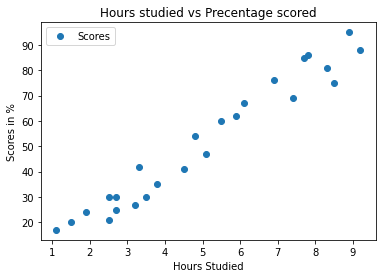

In [16]:
#plotting the data
s_data.plot(x='Hours', y='Scores', style='o')  
plt.xlabel("Hours Studied")
plt.ylabel("Scores in %")
plt.title("Hours studied vs Precentage scored")
plt.show()

In [24]:
#divide the data into inputs and outputs
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [60]:
#splitting the data into test and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [61]:
#Performing linear regression on training set(Training our linear model)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
print("Training complete.")

Training complete.


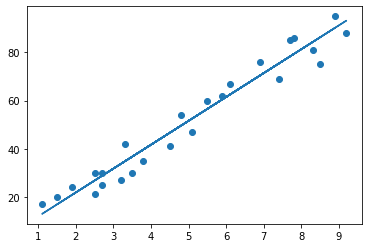

In [34]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x,line)
plt.show()

In [62]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [43]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [59]:
hours = float(input("Enter the Hours: "))
pred = regressor.predict([[hours]])
print("Predicted Score = {}".format(pred[0]))

Enter the Hours: 9.2
Predicted Score = 93.19619966334326


In [58]:
#finding the error in predicted value
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
